In [128]:
import numpy as np
from scipy.linalg import norm 
import matplotlib.pyplot as plt
%run -i helper.py

In [129]:
reps = 200
D00 = {(0,0,0,0):1}
D01 = {(0,0,0,0):0, (0,0,0,1):1}
D10 = {(0,0,0,0):0, (0,0,1,0):1}
D11 = {(0,0,0,0):0, (0,0,1,1):1}

In [130]:
flag1 = 0
flag2 = 1
flag3 = 2
flag4 = 3
q1 = 4
q2 = 5
nflags = 4

In [131]:
def Rn_decomp(start, reps, perm):
    flag1 = []
    flag2 = []
    flag3 = []
    flag4 = []
    for n in range(1,11):
        flag1_temp = []
        flag2_temp = []
        flag3_temp = []
        flag4_temp = []
        for _ in range(reps):
            res1, res2, res3, res4, _ = perm(start, n)
            flag1_temp.append(res1)
            flag2_temp.append(res2)
            flag3_temp.append(res3)
            flag4_temp.append(res4)
        flag1.append(flag1_temp.count(1))
        flag2.append(flag2_temp.count(1))
        flag3.append(flag3_temp.count(1))
        flag4.append(flag4_temp.count(1))
        
    xax = np.linspace(1,10,10)
    fig, axs = plt.subplots(2, 2)
    axs[0, 0].scatter(xax, np.array(flag1)/reps, label=r'$|$0$\rangle$  flag', color='tab:green', lw=12)
    axs[0, 0].plot(xax, np.array(flag1)/reps, color='tab:green', alpha=0.5, lw=4)
    
    axs[1, 0].scatter(xax, np.array(flag2)/reps, label=r'$|$+$\rangle$ flag', color='tab:blue', lw=12)
    axs[1, 0].plot(xax, np.array(flag2)/reps, color='tab:blue', alpha=0.5, lw=4)
    
    axs[0, 1].scatter(xax, np.array(flag3)/reps, label=r'$|$0$\rangle$  flag', color='turquoise', lw=12)
    axs[0, 1].plot(xax, np.array(flag3)/reps, color='turquoise', alpha=0.5, lw=4)
    
    axs[1, 1].scatter(xax, np.array(flag4)/reps, label=r'$|$+$\rangle$ flag', color='rebeccapurple', lw=12)
    axs[1, 1].plot(xax, np.array(flag4)/reps, color='rebeccapurple', alpha=0.5, lw=4)
    
    #plt.ylim([-0.1,1.1])
    #plt.xticks(fontsize=26)
    #plt.yticks([])

In [132]:
#permutation 1

def perm1_circ(start, n):
    reg=Reg(6)
    setstate(start, reg)
    Rn(q1, n+1, reg)
    Rn(q2, n+1, reg)
    H(q2, reg)

    CNOT(q1, flag1, reg)
    H(flag2, reg)
    CNOT(flag2, q2, reg)
    CZ(q1, q2, reg)
    CZ(q1, flag2, reg)
    CNOT(q1, flag1, reg)
    CNOT(flag2, q2, reg)
    H(flag2, reg)

    H(q2, reg)
    Rndag(q2, n+1, reg)
    H(q2, reg)

    CNOT(q1, flag3, reg)
    H(flag4, reg)
    CNOT(flag4, q2, reg)
    CZ(q1, q2, reg)
    CZ(q1, flag4, reg)
    CNOT(q1, flag3, reg)
    CNOT(flag4, q2, reg)
    H(flag4, reg)

    H(q2, reg)
    return measure(flag1, reg), measure(flag2, reg), measure(flag3, reg), measure(flag4, reg), reducedrho([flag1, flag2, flag3, flag4], reg)

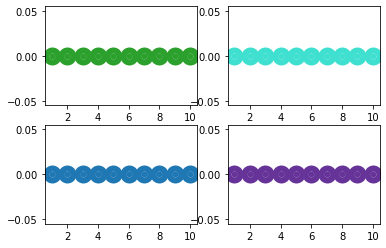

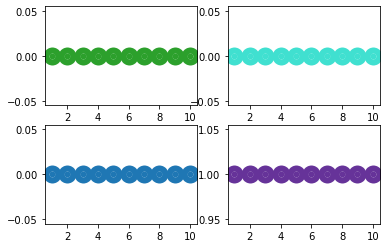

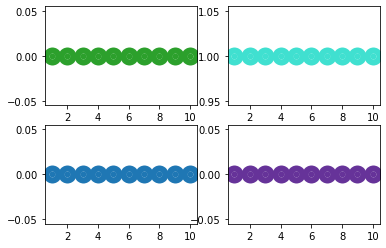

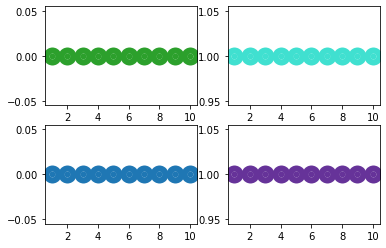

In [133]:
Rn_decomp(D00, reps, perm1_circ)
Rn_decomp(D01, reps, perm1_circ)
Rn_decomp(D10, reps, perm1_circ)
Rn_decomp(D11, reps, perm1_circ)

In [134]:
#permutation 2

def perm2_circ(start, n):
    reg=Reg(6)
    setstate(start, reg)
    Rn(q1, n+1, reg)
    Rn(q2, n+1, reg)
    H(q2, reg)

    CNOT(q1, flag1, reg)
    H(flag2, reg)
    CNOT(flag2, q2, reg)
    CZ(q1, q2, reg)
    CZ(q1, flag2, reg)
    CNOT(q1, flag1, reg)
    CNOT(flag2, q2, reg)
    H(flag2, reg)

    H(q2, reg)
    Rndag(q2, n+1, reg)
    H(q2, reg)
    
    H(flag4, reg)
    CNOT(flag4, q1, reg)
    CNOT(q2, flag3, reg)
    CZ(q1, q2, reg)
    CZ(flag4, q2, reg)
    CNOT(flag4, q1, reg)
    H(flag4, reg)
    CNOT(q2, flag3, reg)

    H(q2, reg)
    return measure(flag1, reg), measure(flag2, reg), measure(flag3, reg), measure(flag4, reg), reducedrho([flag1, flag2, flag3, flag4], reg)

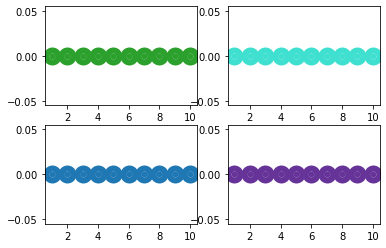

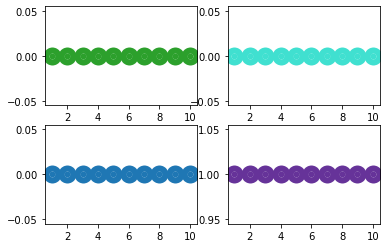

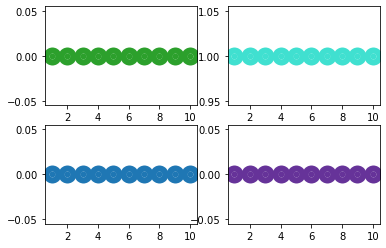

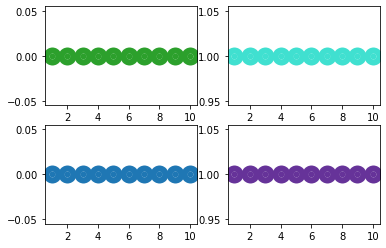

In [135]:
Rn_decomp(D00, reps, perm2_circ)
Rn_decomp(D01, reps, perm2_circ)
Rn_decomp(D10, reps, perm2_circ)
Rn_decomp(D11, reps, perm2_circ)

In [136]:
#permutation 3

def perm3_circ(start, n):
    reg=Reg(6)
    setstate(start, reg)
    Rn(q1, n+1, reg)
    Rn(q2, n+1, reg)
    H(q2, reg)

    H(flag2, reg)
    CNOT(flag2, q1, reg)
    CNOT(q2, flag1, reg)
    CZ(q1, q2, reg)
    CZ(flag2, q2, reg)
    CNOT(flag2, q1, reg)
    H(flag2, reg)
    CNOT(q2, flag1, reg)

    H(q2, reg)
    Rndag(q2, n+1, reg)
    H(q2, reg)
    
    CNOT(q1, flag3, reg)
    H(flag4, reg)
    CNOT(flag4, q2, reg)
    CZ(q1, q2, reg)
    CZ(q1, flag4, reg)
    CNOT(q1, flag3, reg)
    CNOT(flag4, q2, reg)
    H(flag4, reg)

    H(q2, reg)
    return measure(flag1, reg), measure(flag2, reg), measure(flag3, reg), measure(flag4, reg), reducedrho([flag1, flag2, flag3, flag4], reg)

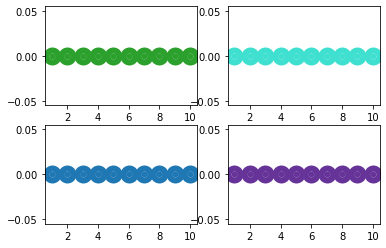

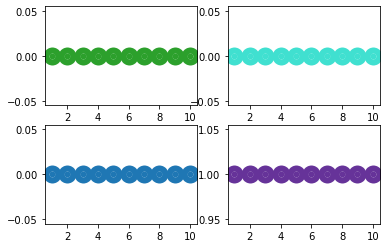

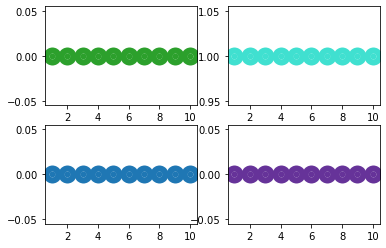

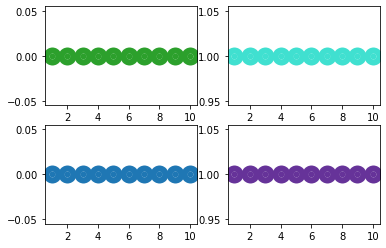

In [137]:
Rn_decomp(D00, reps, perm3_circ)
Rn_decomp(D01, reps, perm3_circ)
Rn_decomp(D10, reps, perm3_circ)
Rn_decomp(D11, reps, perm3_circ)

In [138]:
#permutation 4

def perm4_circ(start, n):
    reg=Reg(6)
    setstate(start, reg)
    Rn(q1, n+1, reg)
    Rn(q2, n+1, reg)
    H(q2, reg)

    H(flag2, reg)
    CNOT(flag2, q1, reg)
    CNOT(q2, flag1, reg)
    CZ(q1, q2, reg)
    CZ(flag2, q2, reg)
    CNOT(flag2, q1, reg)
    H(flag2, reg)
    CNOT(q2, flag1, reg)

    H(q2, reg)
    Rndag(q2, n+1, reg)
    H(q2, reg)
    
    H(flag4, reg)
    CNOT(flag4, q1, reg)
    CNOT(q2, flag3, reg)
    CZ(q1, q2, reg)
    CZ(flag4, q2, reg)
    CNOT(flag4, q1, reg)
    H(flag4, reg)
    CNOT(q2, flag3, reg)
    
    H(q2, reg)
    return measure(flag1, reg), measure(flag2, reg), measure(flag3, reg), measure(flag4, reg), reducedrho([flag1, flag2, flag3, flag4], reg)

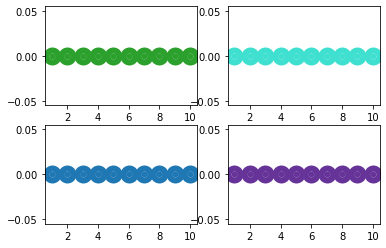

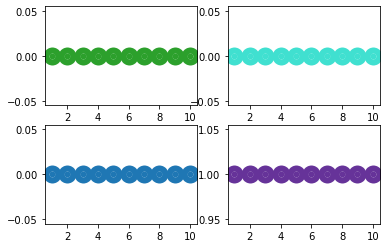

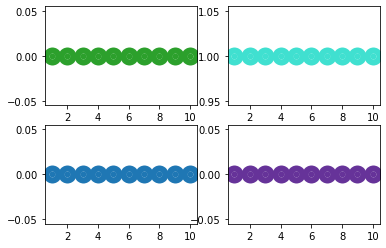

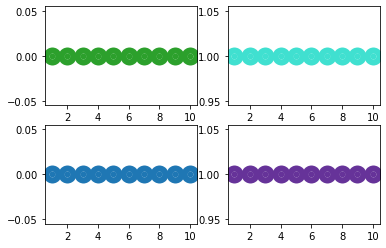

In [139]:
Rn_decomp(D00, reps, perm4_circ)
Rn_decomp(D01, reps, perm4_circ)
Rn_decomp(D10, reps, perm4_circ)
Rn_decomp(D11, reps, perm4_circ)

In [140]:
def benchmark_fid(start, n, perm):
    flag1 = 0
    flag2 = 1
    flag3 = 2
    flag4 = 3
    q1 = 4
    q2 = 5
    nflags = 4
    _, _, _, _, rho1= perm(start, n)
    
    reg2=Reg(4)
    setstate(start, reg2)
    q1=2
    q2=3
    CRn(q1, q2, n, reg2)
    rho2 = reducedrho([flag1, flag2], reg2)
    
    return fidelity(rho1, rho2)

In [141]:
starts = [D00, D01, D10, D11]

In [142]:
fid = []
for n in range(1,11):
    fid_temp = []
    for start in starts:
        fid_temp.append(benchmark_fid(start, n, perm1_circ))
    fid.append(fid_temp)

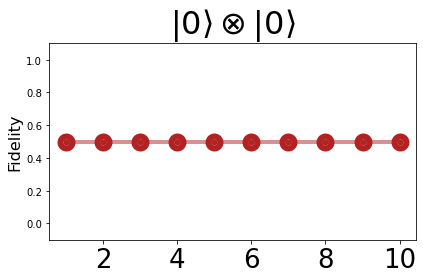

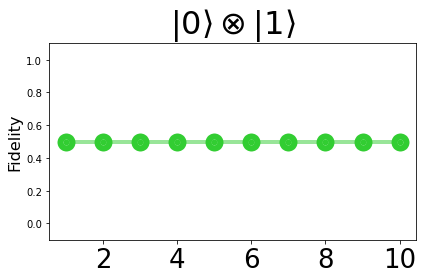

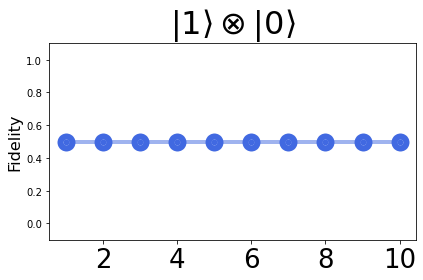

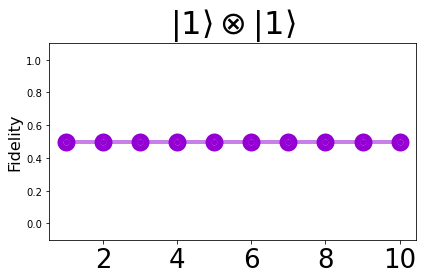

In [143]:
fid = np.array(fid)
xax = np.linspace(1,10,10)

plt.figure(1)
plt.scatter(xax, fid[:,0], label=r'$|$+$\rangle$ flag', color='firebrick', lw=12)
plt.plot(xax, fid[:,0], color='firebrick', alpha=0.5,lw=4)
plt.ylim([-0.1,1.1])
plt.xticks(fontsize=26)
#plt.xlabel(r'$n$',fontsize=28)
plt.ylabel(r'Fidelity',fontsize=16)
#plt.yticks([])
plt.title(r'$|0\rangle\otimes|0\rangle$', fontsize=32)
plt.tight_layout()
plt.savefig('plots/rn_decomp1_d00.pdf')

plt.figure(2)
plt.scatter(xax, fid[:,1], label=r'$|$+$\rangle$ flag', color='limegreen', lw=12)
plt.plot(xax, fid[:,1], color='limegreen', alpha=0.5,lw=4)
plt.ylim([-0.1,1.1])
plt.xticks(fontsize=26)
#plt.xlabel(r'$n$',fontsize=28)
plt.ylabel(r'Fidelity',fontsize=16)
#plt.yticks([])
plt.title(r'$|0\rangle\otimes|1\rangle$', fontsize=32)
plt.tight_layout()
plt.savefig('plots/rn_decomp1_d01.pdf')

plt.figure(3)
plt.scatter(xax, fid[:,2], label=r'$|$+$\rangle$ flag', color='royalblue', lw=12)
plt.plot(xax, fid[:,2], color='royalblue', alpha=0.5,lw=4)
plt.ylim([-0.1,1.1])
plt.xticks(fontsize=26)
#plt.xlabel(r'$n$',fontsize=26)
plt.ylabel(r'Fidelity',fontsize=16)
#plt.yticks([])
plt.title(r'$|1\rangle\otimes|0\rangle$', fontsize=32)
plt.tight_layout()
plt.savefig('plots/rn_decomp1_d10.pdf')

plt.figure(4)
plt.scatter(xax, fid[:,3], label=r'$|$+$\rangle$ flag', color='darkviolet', lw=12)
plt.plot(xax, fid[:,3], color='darkviolet', alpha=0.5,lw=4)
plt.ylim([-0.1,1.1])
plt.xticks(fontsize=26)
#plt.xlabel(r'$n$',fontsize=26)
plt.ylabel(r'Fidelity',fontsize=16)
#plt.yticks([])
plt.title(r'$|1\rangle\otimes|1\rangle$', fontsize=32)
plt.tight_layout()
plt.savefig('plots/rn_decomp1_d11.pdf')

plt.show()

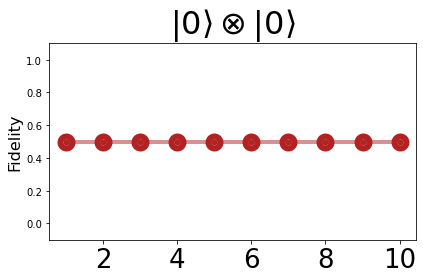

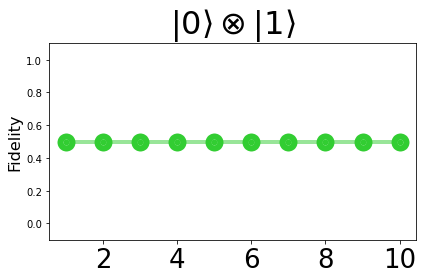

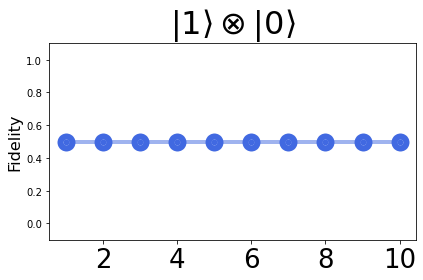

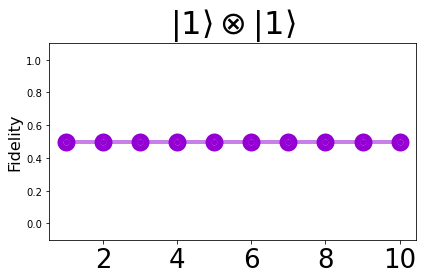

In [144]:
fid = []
for n in range(1,11):
    fid_temp = []
    for start in starts:
        fid_temp.append(benchmark_fid(start, n, perm2_circ))
    fid.append(fid_temp)
    
fid = np.array(fid)
xax = np.linspace(1,10,10)

plt.figure(1)
plt.scatter(xax, fid[:,0], label=r'$|$+$\rangle$ flag', color='firebrick', lw=12)
plt.plot(xax, fid[:,0], color='firebrick', alpha=0.5,lw=4)
plt.ylim([-0.1,1.1])
plt.xticks(fontsize=26)
#plt.xlabel(r'$n$',fontsize=28)
plt.ylabel(r'Fidelity',fontsize=16)
#plt.yticks([])
plt.title(r'$|0\rangle\otimes|0\rangle$', fontsize=32)
plt.tight_layout()
plt.savefig('plots/rn_decomp2_d00.pdf')

plt.figure(2)
plt.scatter(xax, fid[:,1], label=r'$|$+$\rangle$ flag', color='limegreen', lw=12)
plt.plot(xax, fid[:,1], color='limegreen', alpha=0.5,lw=4)
plt.ylim([-0.1,1.1])
plt.xticks(fontsize=26)
#plt.xlabel(r'$n$',fontsize=28)
plt.ylabel(r'Fidelity',fontsize=16)
#plt.yticks([])
plt.title(r'$|0\rangle\otimes|1\rangle$', fontsize=32)
plt.tight_layout()
plt.savefig('plots/rn_decomp2_d01.pdf')

plt.figure(3)
plt.scatter(xax, fid[:,2], label=r'$|$+$\rangle$ flag', color='royalblue', lw=12)
plt.plot(xax, fid[:,2], color='royalblue', alpha=0.5,lw=4)
plt.ylim([-0.1,1.1])
plt.xticks(fontsize=26)
#plt.xlabel(r'$n$',fontsize=26)
plt.ylabel(r'Fidelity',fontsize=16)
#plt.yticks([])
plt.title(r'$|1\rangle\otimes|0\rangle$', fontsize=32)
plt.tight_layout()
plt.savefig('plots/rn_decomp2_d10.pdf')

plt.figure(4)
plt.scatter(xax, fid[:,3], label=r'$|$+$\rangle$ flag', color='darkviolet', lw=12)
plt.plot(xax, fid[:,3], color='darkviolet', alpha=0.5,lw=4)
plt.ylim([-0.1,1.1])
plt.xticks(fontsize=26)
#plt.xlabel(r'$n$',fontsize=26)
plt.ylabel(r'Fidelity',fontsize=16)
#plt.yticks([])
plt.title(r'$|1\rangle\otimes|1\rangle$', fontsize=32)
plt.tight_layout()
plt.savefig('plots/rn_decomp2_d11.pdf')

plt.show()

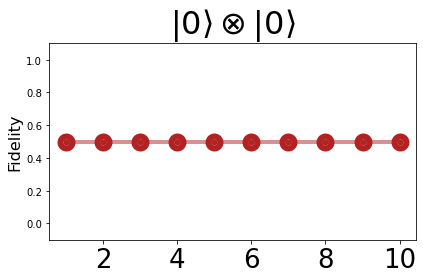

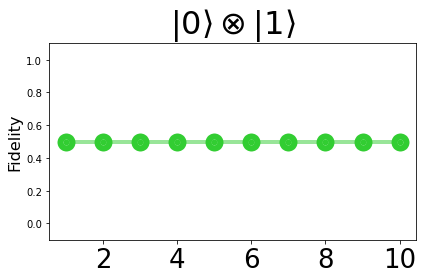

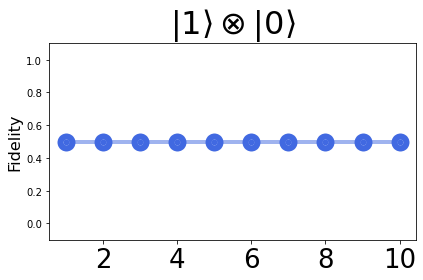

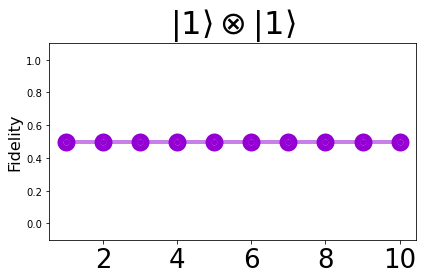

In [145]:
fid = []
for n in range(1,11):
    fid_temp = []
    for start in starts:
        fid_temp.append(benchmark_fid(start, n, perm3_circ))
    fid.append(fid_temp)
    
fid = np.array(fid)
xax = np.linspace(1,10,10)

plt.figure(1)
plt.scatter(xax, fid[:,0], label=r'$|$+$\rangle$ flag', color='firebrick', lw=12)
plt.plot(xax, fid[:,0], color='firebrick', alpha=0.5,lw=4)
plt.ylim([-0.1,1.1])
plt.xticks(fontsize=26)
#plt.xlabel(r'$n$',fontsize=28)
plt.ylabel(r'Fidelity',fontsize=16)
#plt.yticks([])
plt.title(r'$|0\rangle\otimes|0\rangle$', fontsize=32)
plt.tight_layout()
plt.savefig('plots/rn_decomp3_d00.pdf')

plt.figure(2)
plt.scatter(xax, fid[:,1], label=r'$|$+$\rangle$ flag', color='limegreen', lw=12)
plt.plot(xax, fid[:,1], color='limegreen', alpha=0.5,lw=4)
plt.ylim([-0.1,1.1])
plt.xticks(fontsize=26)
#plt.xlabel(r'$n$',fontsize=28)
plt.ylabel(r'Fidelity',fontsize=16)
#plt.yticks([])
plt.title(r'$|0\rangle\otimes|1\rangle$', fontsize=32)
plt.tight_layout()
plt.savefig('plots/rn_decomp3_d01.pdf')

plt.figure(3)
plt.scatter(xax, fid[:,2], label=r'$|$+$\rangle$ flag', color='royalblue', lw=12)
plt.plot(xax, fid[:,2], color='royalblue', alpha=0.5,lw=4)
plt.ylim([-0.1,1.1])
plt.xticks(fontsize=26)
#plt.xlabel(r'$n$',fontsize=26)
plt.ylabel(r'Fidelity',fontsize=16)
#plt.yticks([])
plt.title(r'$|1\rangle\otimes|0\rangle$', fontsize=32)
plt.tight_layout()
plt.savefig('plots/rn_decomp3_d10.pdf')

plt.figure(4)
plt.scatter(xax, fid[:,3], label=r'$|$+$\rangle$ flag', color='darkviolet', lw=12)
plt.plot(xax, fid[:,3], color='darkviolet', alpha=0.5,lw=4)
plt.ylim([-0.1,1.1])
plt.xticks(fontsize=26)
#plt.xlabel(r'$n$',fontsize=26)
plt.ylabel(r'Fidelity',fontsize=16)
#plt.yticks([])
plt.title(r'$|1\rangle\otimes|1\rangle$', fontsize=32)
plt.tight_layout()
plt.savefig('plots/rn_decomp3_d11.pdf')

plt.show()

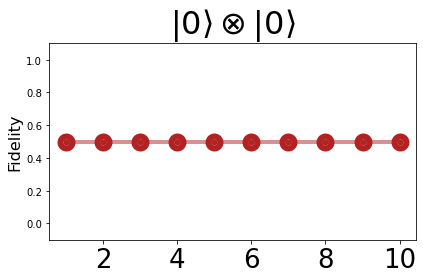

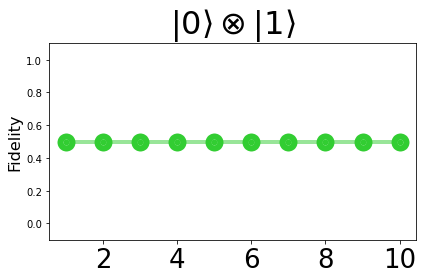

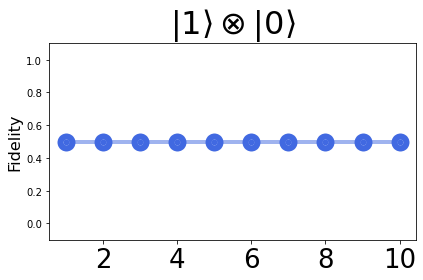

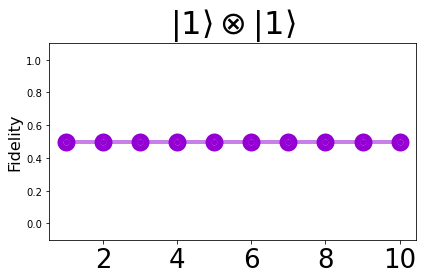

In [146]:
fid = []
for n in range(1,11):
    fid_temp = []
    for start in starts:
        fid_temp.append(benchmark_fid(start, n, perm4_circ))
    fid.append(fid_temp)
    
fid = np.array(fid)
xax = np.linspace(1,10,10)

plt.figure(1)
plt.scatter(xax, fid[:,0], label=r'$|$+$\rangle$ flag', color='firebrick', lw=12)
plt.plot(xax, fid[:,0], color='firebrick', alpha=0.5,lw=4)
plt.ylim([-0.1,1.1])
plt.xticks(fontsize=26)
#plt.xlabel(r'$n$',fontsize=28)
plt.ylabel(r'Fidelity',fontsize=16)
#plt.yticks([])
plt.title(r'$|0\rangle\otimes|0\rangle$', fontsize=32)
plt.tight_layout()
plt.savefig('plots/rn_decomp4_d00.pdf')

plt.figure(2)
plt.scatter(xax, fid[:,1], label=r'$|$+$\rangle$ flag', color='limegreen', lw=12)
plt.plot(xax, fid[:,1], color='limegreen', alpha=0.5,lw=4)
plt.ylim([-0.1,1.1])
plt.xticks(fontsize=26)
#plt.xlabel(r'$n$',fontsize=28)
plt.ylabel(r'Fidelity',fontsize=16)
#plt.yticks([])
plt.title(r'$|0\rangle\otimes|1\rangle$', fontsize=32)
plt.tight_layout()
plt.savefig('plots/rn_decomp4_d01.pdf')

plt.figure(3)
plt.scatter(xax, fid[:,2], label=r'$|$+$\rangle$ flag', color='royalblue', lw=12)
plt.plot(xax, fid[:,2], color='royalblue', alpha=0.5,lw=4)
plt.ylim([-0.1,1.1])
plt.xticks(fontsize=26)
#plt.xlabel(r'$n$',fontsize=26)
plt.ylabel(r'Fidelity',fontsize=16)
#plt.yticks([])
plt.title(r'$|1\rangle\otimes|0\rangle$', fontsize=32)
plt.tight_layout()
plt.savefig('plots/rn_decomp4_d10.pdf')

plt.figure(4)
plt.scatter(xax, fid[:,3], label=r'$|$+$\rangle$ flag', color='darkviolet', lw=12)
plt.plot(xax, fid[:,3], color='darkviolet', alpha=0.5,lw=4)
plt.ylim([-0.1,1.1])
plt.xticks(fontsize=26)
#plt.xlabel(r'$n$',fontsize=26)
plt.ylabel(r'Fidelity',fontsize=16)
#plt.yticks([])
plt.title(r'$|1\rangle\otimes|1\rangle$', fontsize=32)
plt.tight_layout()
plt.savefig('plots/rn_decomp4_d11.pdf')

plt.show()